In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [90]:
df = pd.read_csv('Modified_Soil_Fertility_Labeled (2).csv')

In [91]:
df.head()

,N,P,K,Ph,EC,OC,S,Zn,Fe,Cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,Less Fertile
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,Less Fertile
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,Less Fertile
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,Less Fertile
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,Less Fertile


In [92]:
df['fertility'].value_counts()

fertility
Highly Fertile    447
Fertile           440
Less Fertile      401
Name: count, dtype: int64

In [93]:
df.describe()

,N,P,K,Ph,EC,OC,S,Zn,Fe,Cu,Mn,B
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,269.061335,17.643478,497.135093,7.549130,0.535893,0.632174,7.122888,0.442811,4.119185,0.911281,8.601530,0.611957
std,80.542499,25.303343,120.887088,0.507163,0.134156,0.720488,4.026723,1.568333,3.028314,0.448782,4.466209,0.560781
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000
25%,207.000000,7.200000,422.000000,7.340000,0.430000,0.390000,4.520000,0.280000,1.360000,0.600000,6.045000,0.290000
50%,289.000000,9.200000,465.000000,7.500000,0.530000,0.620000,6.330000,0.360000,3.740000,0.890000,8.540000,0.420000
75%,333.000000,13.800000,570.000000,7.700000,0.630000,0.832500,8.450000,0.480000,6.320000,1.250000,11.560000,0.650000
max,383.000000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000


In [94]:
df.isna().sum()

N            0
P            0
K            0
Ph           0
EC           0
OC           0
S            0
Zn           0
Fe           0
Cu           0
Mn           0
B            0
fertility    0
dtype: int64

In [95]:
df.columns

Index(['N', 'P', 'K', 'Ph', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'fertility'],
      dtype='object')

In [96]:
df['fertility'] = df['fertility'].map({
    'Less Fertile': 0,
    'Fertile': 1,
    'Highly Fertile': 2 
})

In [97]:
df

,N,P,K,Ph,EC,OC,S,Zn,Fe,Cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,326,13.4,454,7.13,0.51,0.88,5.13,0.29,4.85,0.78,9.32,0.27,2
1284,333,14.9,422,8.26,0.48,1.17,3.32,0.60,7.62,1.02,11.65,0.29,2
1285,320,13.8,391,7.38,0.65,0.68,7.54,0.38,5.41,0.89,9.05,0.63,2
1286,333,14.3,507,7.43,0.61,0.88,7.24,0.37,1.26,1.37,12.03,0.29,2


In [98]:
# Check number of classes in target
print("Number of fertility classes:", df['fertility'].nunique())

Number of fertility classes: 3


In [99]:
# Split features and target
X = df.drop('fertility', axis=1)
y = df['fertility']

In [100]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)

In [101]:
X_train.shape

(1030, 12)

In [102]:
X_test.shape

(258, 12)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22632\494120752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fertility', data=df, palette='viridis')


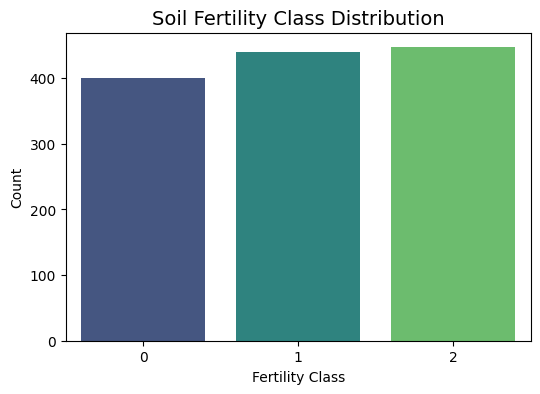

In [103]:
# 3️⃣ Fertility Class Distribution (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='fertility', data=df, palette='viridis')
plt.title('Soil Fertility Class Distribution', fontsize=14)
plt.xlabel('Fertility Class')
plt.ylabel('Count')
plt.show()

In [104]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [105]:
# Train Random Forest model
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [107]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9689922480620154
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        86
           1       0.96      0.94      0.95        87
           2       1.00      1.00      1.00        85

    accuracy                           0.97       258
   macro avg       0.97      0.97      0.97       258
weighted avg       0.97      0.97      0.97       258



In [108]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9728682170542635
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        86
           1       0.97      0.95      0.96        87
           2       0.99      1.00      0.99        85

    accuracy                           0.97       258
   macro avg       0.97      0.97      0.97       258
weighted avg       0.97      0.97      0.97       258



In [109]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'soil_fertility_model.pkl')

['soil_fertility_model.pkl']